In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
fs = 150  # hz
T = 2.2  # s
N = int(T * fs)

In [7]:
def dft(func, size):
    X = [0] * size
    for k in range(size):
        X[k] = sum([
            func(n) * np.exp((-1j * np.pi * k * n) / size)
            for n in range(size)
        ])
    return X

In [11]:
def prepare_plot(X):
    size = len(X) // 2 - 1
    
    M = [0] * size
    for k in range(size):
        M[k] = np.sqrt(X[k].real ** 2 + X[k].imag ** 2)

    M_ = [10 * np.log10(m) for m in M]
    fk = [k * fs / len(X) for k in range(size)]
    
    return fk, M_

In [27]:
def plot(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    line, = ax.plot(x, y, color='blue', lw=2)
    
    ax = fig.add_subplot(2, 1, 2)
    line, = ax.plot(x, y, color='blue', lw=2)
    ax.set_xscale('log')

In [20]:
def calculate(func):
    X = dft(func, N)
    x, y = prepare_plot(X)
    plot(x, y)

In [21]:
x = lambda n: 0.9 * np.sin(2 * np.pi * (n / fs) * np.cos(np.pi * (n / fs)) + 3 * np.pi)

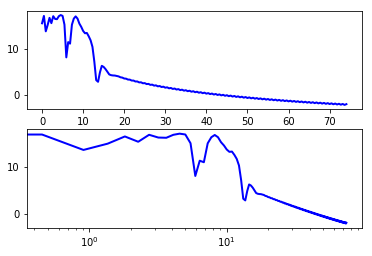

In [28]:
calculate(x)

In [29]:
y = lambda n: np.exp(-n / 25)
z = lambda n: 0.001 * x(n) + 0.01 * y(n)
v = lambda n: x(n) * y(n)

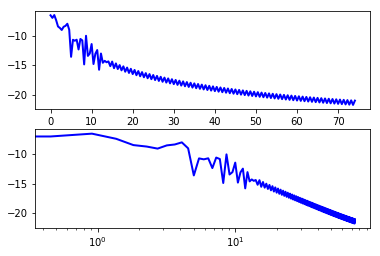

In [30]:
calculate(z)

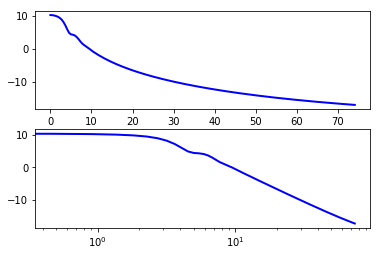

In [39]:
calculate(v)

In [40]:
def d(n):
    t = n / fs
    if t >= 0.7:
        return 0.2 * np.sin(40 * np.pi * t) * np.sin(20 * np.pi * t)
    elif t >= 0.2:
        return (1/t) * 0.8 * np.sin(34 * np.pi * t)
    else:
        return (t + 0.5) * np.sin(50 * np.pi * t)

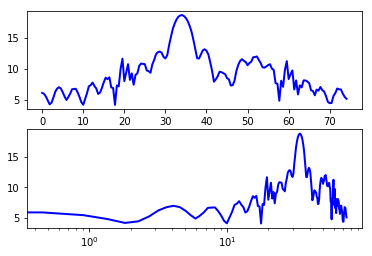

In [41]:
calculate(d)

In [35]:
g = lambda H: lambda n: (9 / np.pi ** 2) * sum([np.sin((i * (n / fs) * np.pi) / 2) * np.sin(20 * n * np.pi * (n / fs)) for i in range(1, H + 1)])

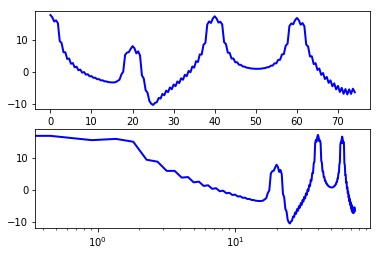

In [36]:
calculate(g(3))

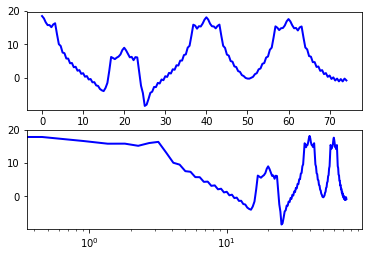

In [37]:
calculate(g(6))

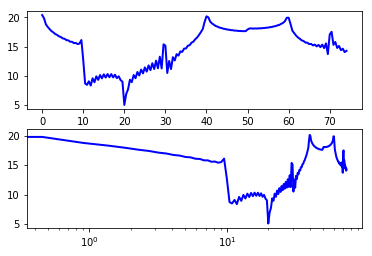

In [38]:
calculate(g(60))